In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import librosa
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

import librosa.display

import matplotlib.style as ms
ms.use('seaborn-muted')

%matplotlib nbagg

from IPython.display import Audio

In [3]:
#load file from local directory
y2, sr2 = librosa.load('Files/10.wav')

#adjust hop length to 512 samples between each frame and store in a Data Frame
D = librosa.stft(y2,hop_length=512)

In [4]:
#Adjust Data Frame Shape
print(D.shape, D.dtype)

#Calculate total time of recording in seconds
print(librosa.samples_to_time(len(y2), sr2))

(1025, 431) complex64
10.0


In [5]:
# Calculate the magphase of the waveform
S, phase = librosa.magphase(D)
print(S.dtype, phase.dtype, np.allclose(D,S*phase))

float32 complex64 True


In [6]:
#melspec data
melspec = librosa.feature.melspectrogram(y=y2, sr=sr2)

#Melspec assumes power, not energy as input
melspec_stft = librosa.feature.melspectrogram(S=S**2, sr=sr2)

print(np.allclose(melspec,melspec_stft))

#save melspec data stft data to a numpy array
mel=np.array(melspec)
#convert to 1D array
m=mel.ravel()
#store array in Data Frame
df = pd.DataFrame(m)
#Write to local CSV file
df.to_csv('Mel/10.csv')

True


<IPython.core.display.Javascript object>


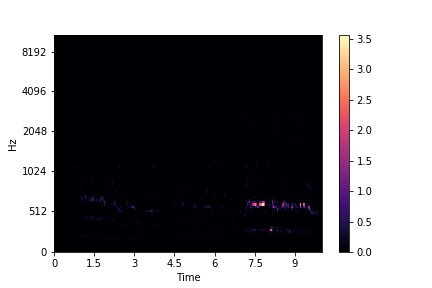

In [7]:
#display melspec data
plt.figure()
librosa.display.specshow(melspec,y_axis='mel', x_axis='time')
plt.colorbar()

<IPython.core.display.Javascript object>


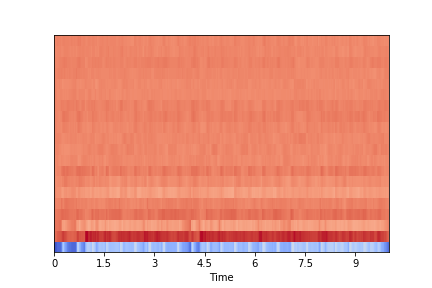

In [8]:
#calculate mfcc values
mfcc = librosa.feature.mfcc(y=y2, sr=sr2)
#display mfcc data in a plot
plt.figure()
librosa.display.specshow(mfcc, x_axis='time')

In [9]:
#store mfcc data in an numpy array
mfcc_data=np.array(mfcc)
#convert to one dimensional dataframe
mfd=mfcc_data.ravel()
df2=pd.DataFrame(mfd)
#write to local csv file
df2.to_csv('MFCC/10.csv')

<IPython.core.display.Javascript object>


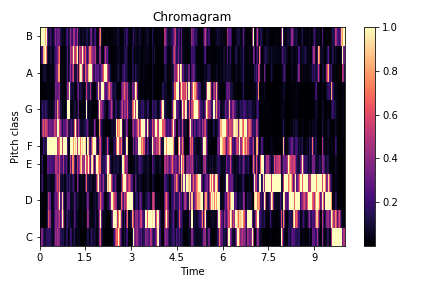

In [10]:
import scipy

chroma=librosa.feature.chroma_stft(y=y2, sr=sr2)
plt.figure()
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagram')
plt.tight_layout()

In [11]:
#store chroma in a numpy array
chroma_data= np.array(chroma)
#write to one dimensional array and evntually csv file
chrm=chroma_data.ravel()
df3=pd.DataFrame(chrm)
df3.to_csv('Chroma/10.csv')

<IPython.core.display.Javascript object>


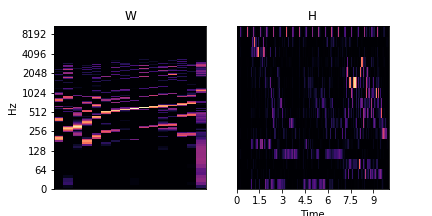

In [12]:
# Fit the model
W, H = librosa.decompose.decompose(S, n_components=16, sort=True)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1), plt.title('W')
librosa.display.specshow(librosa.amplitude_to_db(W**2), y_axis='log')
plt.subplot(1, 2, 2), plt.title('H')
librosa.display.specshow(H, x_axis='time')